In [1]:
# load all required libraries for plots, EDA, Log regression, decision tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# import xlsx file from google drive

from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/bankloan.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify
print(df.head())


Mounted at /content/drive
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [7]:
#describe the data

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   Experience       

In [8]:
# replace any  negative values (if any) with NaN
df['Experience'] = df['Experience'].apply(lambda x: np.nan if x < 0 else x)

# Calculate the median of the 'experience' column again after replacing all negatives
median_experience = df['Experience'].median()

# Impute the NaN values with the median
df['Experience'] = df['Experience'].fillna(median_experience)

# Verify the imputation
print("\nDescription of 'Experience' after replacing all negative values and imputing with median:")
print(df['Experience'].describe())

# check for negative values explicitly
print("\nNumber of negative values in 'experience' after imputation:")
print(df[df['Experience'] < 0]['Experience'].count())


Description of 'Experience' after replacing all negative values and imputing with median:
count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Number of negative values in 'experience' after imputation:
0


In [9]:
# remove non-useful columns such as ID and zip code etc

# Define the columns to drop
columns_to_drop = ['ID', 'ZIP Code']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Display the first few rows of the DataFrame to verify
print(df.head())

# Display the columns of the DataFrame to verify
df.columns

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25         1.0      49       4    1.6          1         0              0   
1   45        19.0      34       3    1.5          1         0              0   
2   39        15.0      11       1    1.0          1         0              0   
3   35         9.0     100       1    2.7          2         0              0   
4   35         8.0      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')


Univariate analysis for Age:


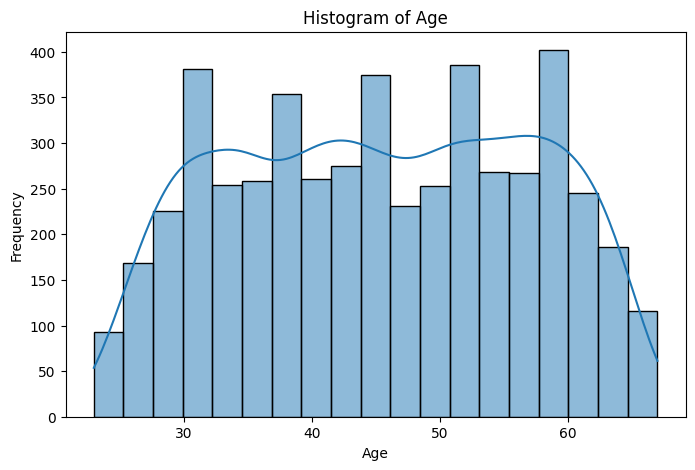

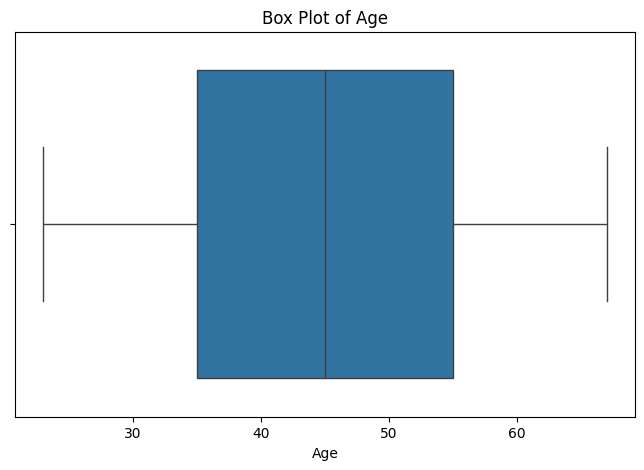

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

Univariate analysis for Experience:


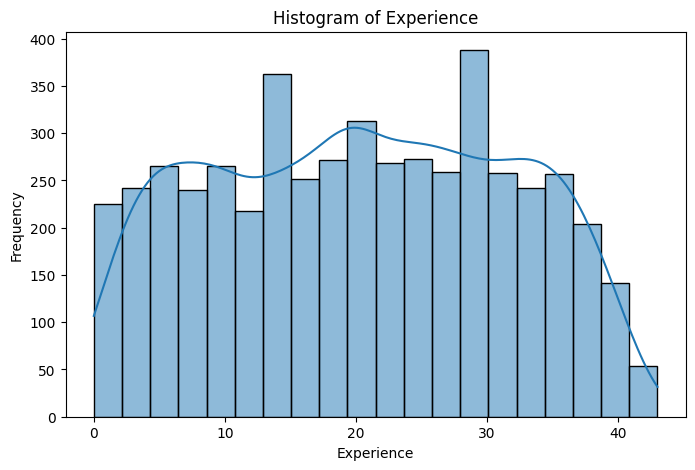

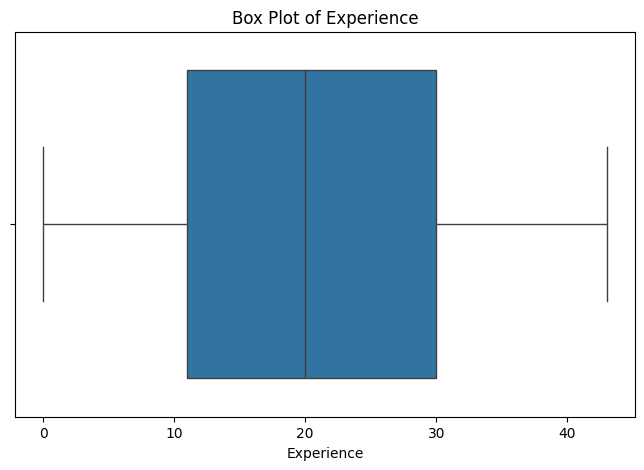

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Univariate analysis for Income:


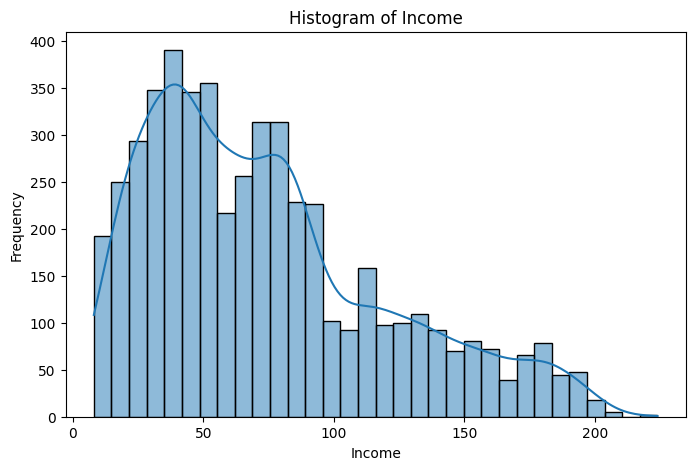

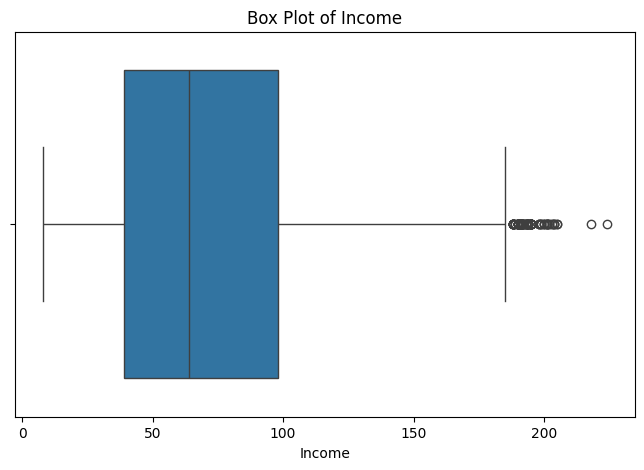

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

Univariate analysis for Family:


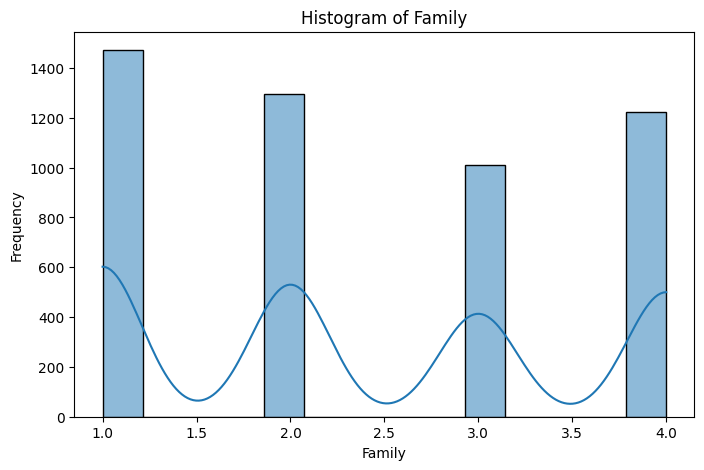

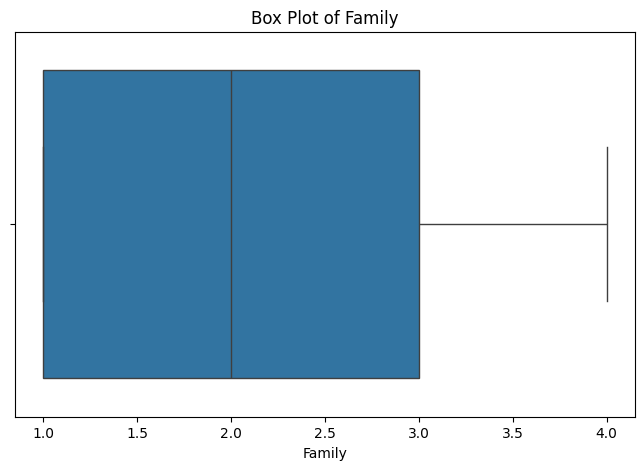

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

Univariate analysis for CCAvg:


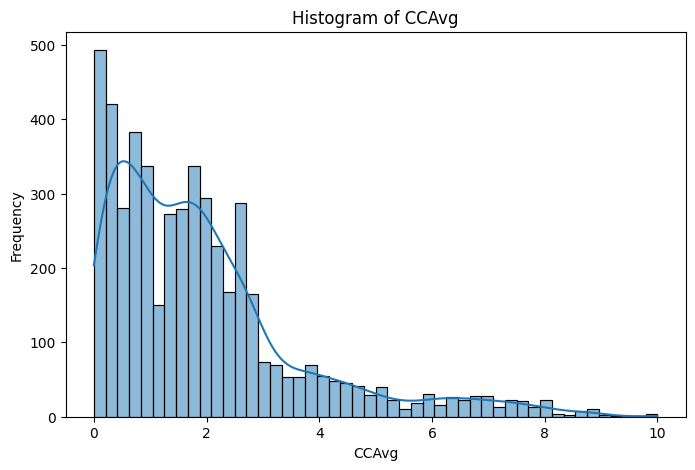

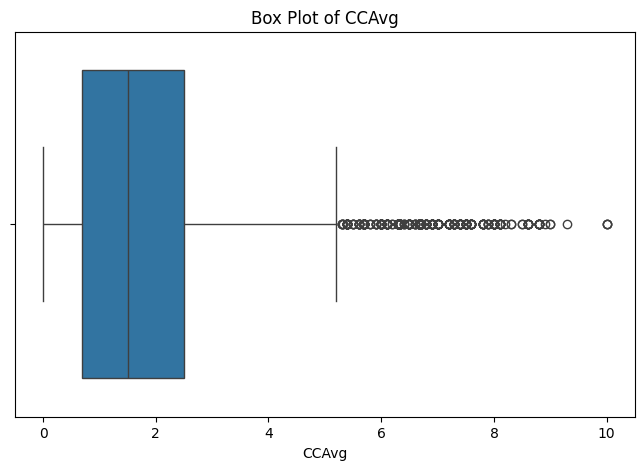

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

Univariate analysis for Education:


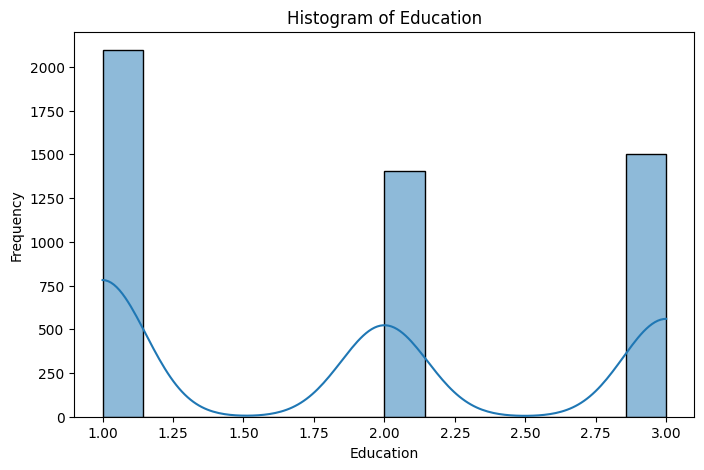

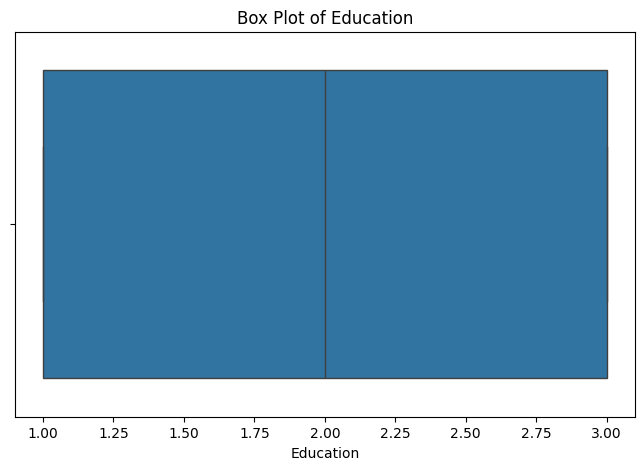

count    5000.000000
mean        1.881000
std         0.839869
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

Univariate analysis for Mortgage:


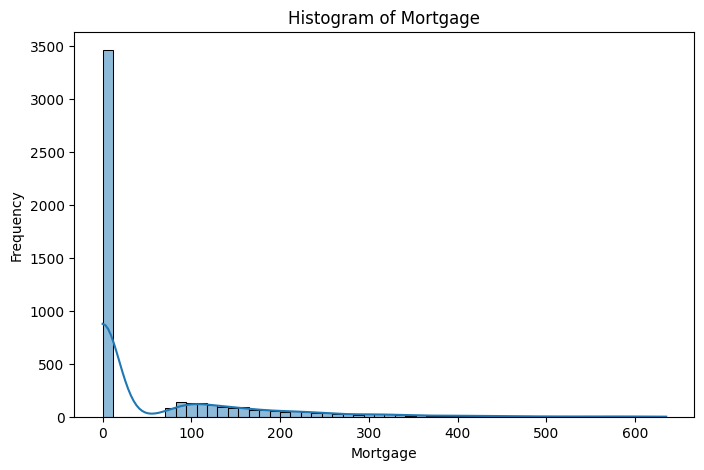

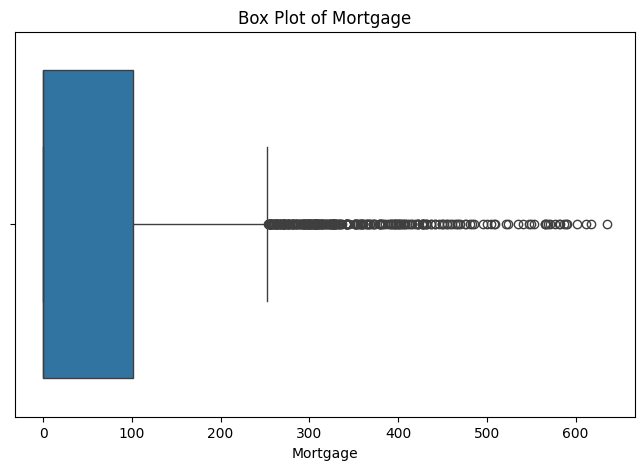

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


In [10]:
# univariate analysis of Age, Experience, Income, Family, CCAvg, Education, Mortgage

# List of columns for univariate analysis
cols_for_analysis = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

# Create histograms and box plots for numerical variables
for col in cols_for_analysis:
    print(f"\nUnivariate analysis for {col}:")

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Basic statistics
    print(df[col].describe())

In [11]:
# remove negative and positive skews by using either log or sqrt

# Function to apply transformations based on skewness
def handle_skewness(df, column):
    skewness = df[column].skew()
    print(f"\nSkewness of {column}: {skewness}")
    if skewness > 0.5: # Positive skew
        print(f"Applying log transformation to {column}")
        df[column + '_log'] = np.log1p(df[column]) # Using log1p to handle zero values
        print(f"Skewness after log transformation: {df[column + '_log'].skew()}")
    elif skewness < -0.5: # Negative skew (less common for these types of variables)
        print(f"Applying square root transformation to {column}")
        df[column + '_sqrt'] = np.sqrt(df[column])
        print(f"Skewness after sqrt transformation: {df[column + '_sqrt'].skew()}")
    else:
        print(f"Skewness of {column} is within acceptable range.")

# Apply the function to relevant columns
cols_to_check_skew = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for col in cols_to_check_skew:
    handle_skewness(df, col)

# Display head to see new transformed columns (if any)
print(df.head())




Skewness of Age: -0.02934068151284029
Skewness of Age is within acceptable range.

Skewness of Experience: -0.01409975101962344
Skewness of Experience is within acceptable range.

Skewness of Income: 0.8413386072610816
Applying log transformation to Income
Skewness after log transformation: -0.42071189305490625

Skewness of Family: 0.15522066944367582
Skewness of Family is within acceptable range.

Skewness of CCAvg: 1.5984433366678663
Applying log transformation to CCAvg
Skewness after log transformation: 0.31922379644464294

Skewness of Education: 0.22709331566088503
Skewness of Education is within acceptable range.

Skewness of Mortgage: 2.1040023191079444
Applying log transformation to Mortgage
Skewness after log transformation: 0.8766882783607729
   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25         1.0      49       4    1.6          1         0              0   
1   45        19.0      34       3    1.5          1         0             

In [12]:
# drop the skewed columns and used the treated columns

# Identify columns that were transformed based on skewness
transformed_cols = [col for col in df.columns if '_log' in col or '_sqrt' in col]

# Identify original columns that were skewed and have a transformed counterpart
original_skewed_cols = [col.replace('_log', '').replace('_sqrt', '') for col in transformed_cols]

# Drop the original skewed columns
df = df.drop(columns=original_skewed_cols, axis=1)

# Rename the transformed columns to their original names
rename_dict = {}
for col in transformed_cols:
    original_name = col.replace('_log', '').replace('_sqrt', '')
    rename_dict[col] = original_name

df = df.rename(columns=rename_dict)

# Display the first few rows and columns to verify
print("\nDataFrame after dropping original skewed columns and renaming transformed columns:")
print(df.head())
print("\nUpdated columns:")
df.columns


DataFrame after dropping original skewed columns and renaming transformed columns:
   Age  Experience  Family  Education  Personal Loan  Securities Account  \
0   25         1.0       4          1              0                   1   
1   45        19.0       3          1              0                   1   
2   39        15.0       1          1              0                   0   
3   35         9.0       1          2              0                   0   
4   35         8.0       4          2              0                   0   

   CD Account  Online  CreditCard    Income     CCAvg  Mortgage  
0           0       0           0  3.912023  0.955511       0.0  
1           0       0           0  3.555348  0.916291       0.0  
2           0       0           0  2.484907  0.693147       0.0  
3           0       0           0  4.615121  1.308333       0.0  
4           0       0           1  3.828641  0.693147       0.0  

Updated columns:


Index(['Age', 'Experience', 'Family', 'Education', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Income',
       'CCAvg', 'Mortgage'],
      dtype='object')


Univariate analysis for Age:


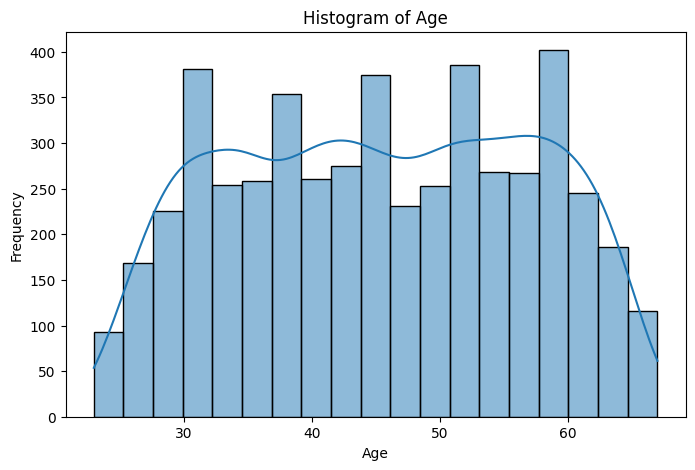

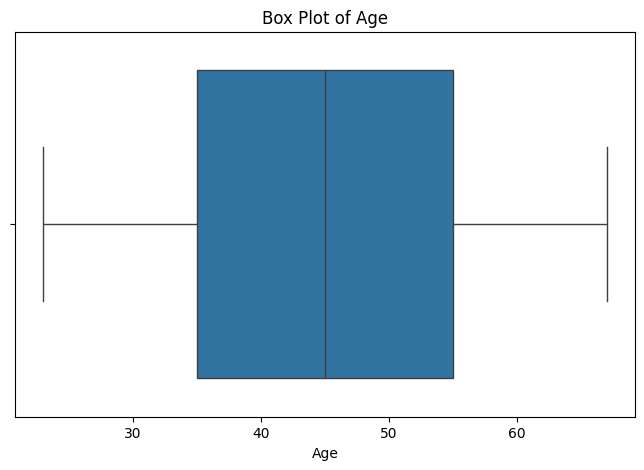

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

Univariate analysis for Experience:


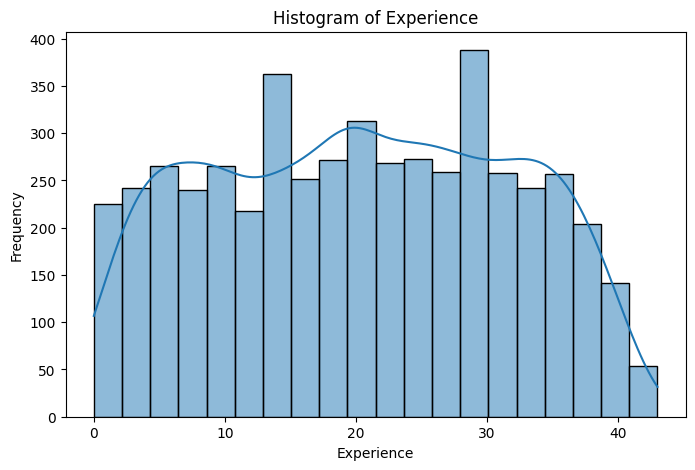

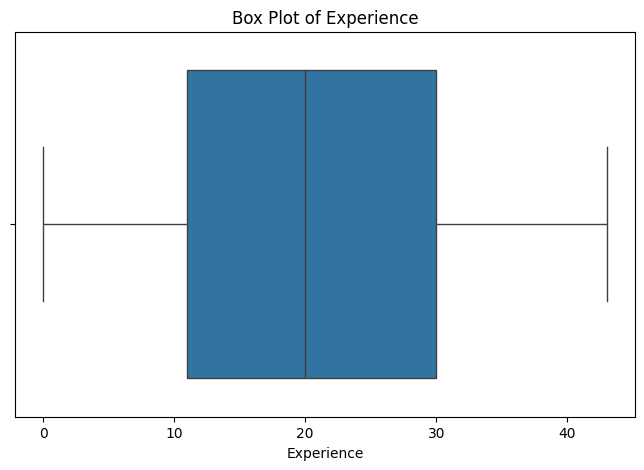

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Univariate analysis for Income:


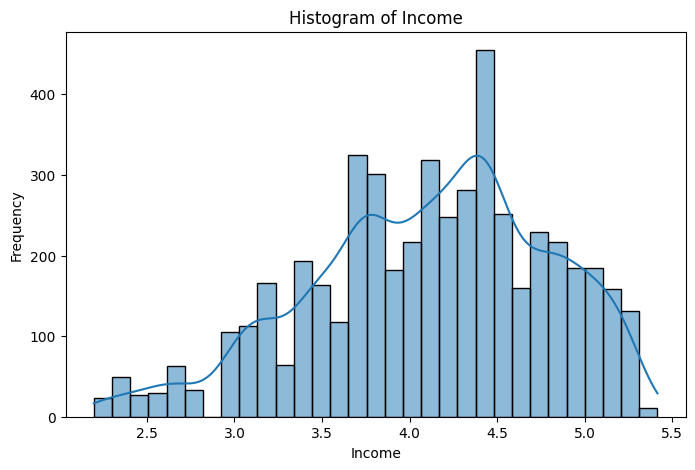

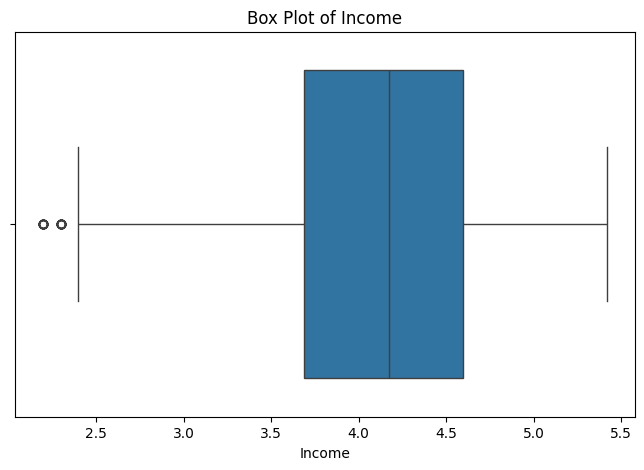

count    5000.000000
mean        4.106952
std         0.679975
min         2.197225
25%         3.688879
50%         4.174387
75%         4.595120
max         5.416100
Name: Income, dtype: float64

Univariate analysis for Family:


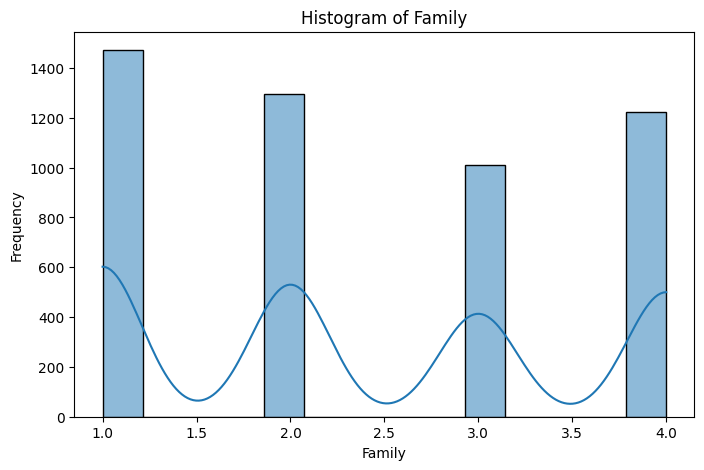

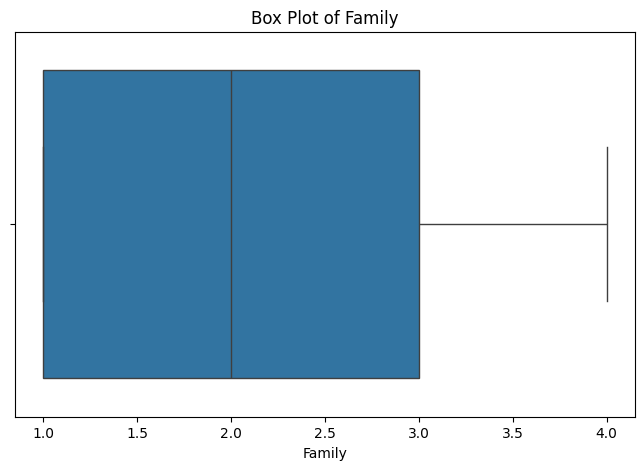

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

Univariate analysis for CCAvg:


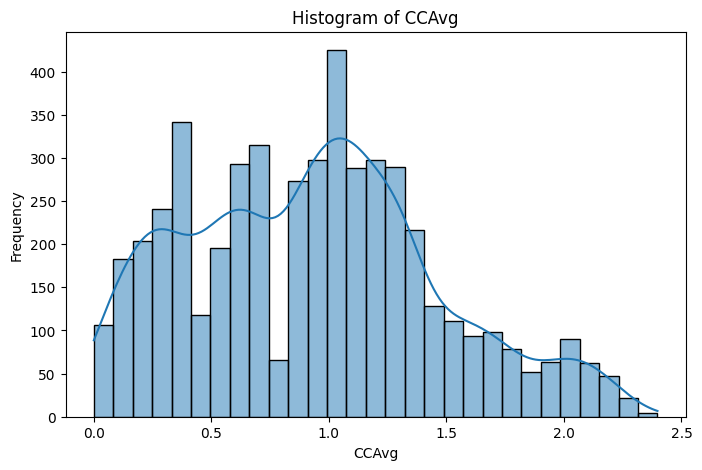

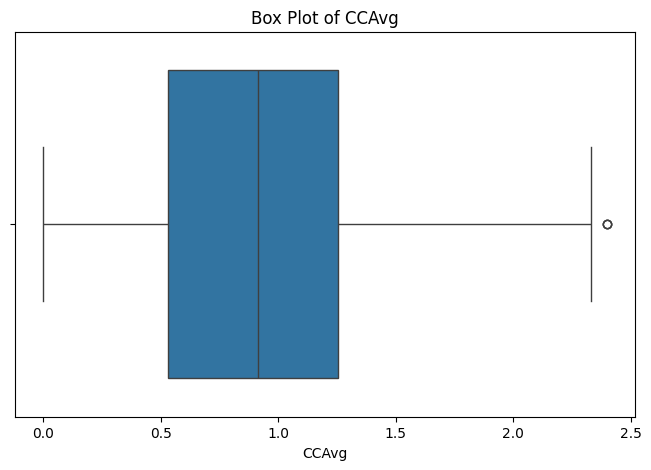

count    5000.000000
mean        0.929356
std         0.533274
min         0.000000
25%         0.530628
50%         0.916291
75%         1.252763
max         2.397895
Name: CCAvg, dtype: float64

Univariate analysis for Education:


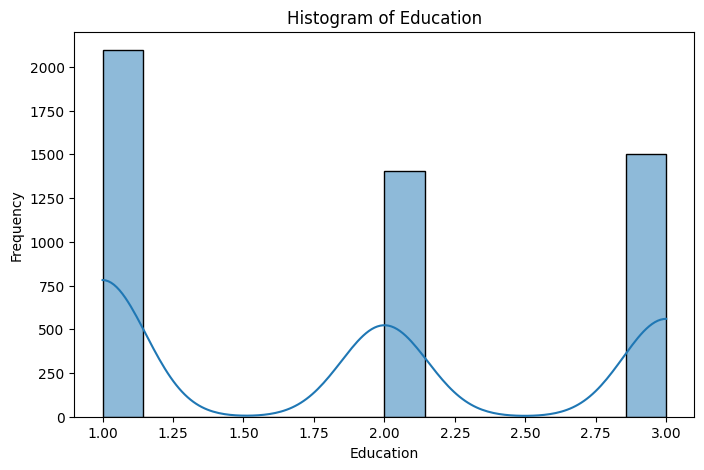

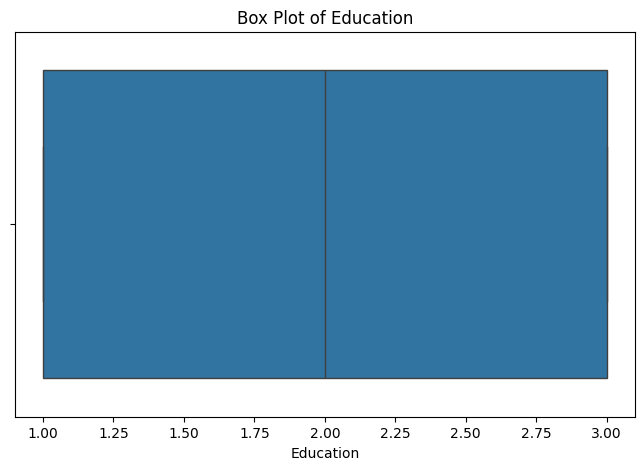

count    5000.000000
mean        1.881000
std         0.839869
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

Univariate analysis for Mortgage:


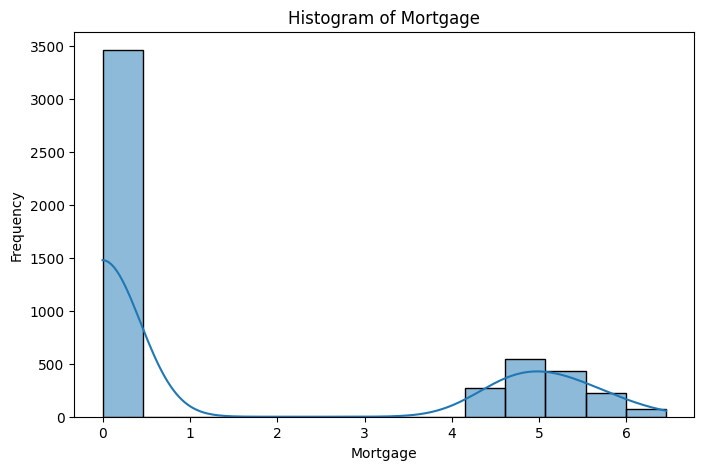

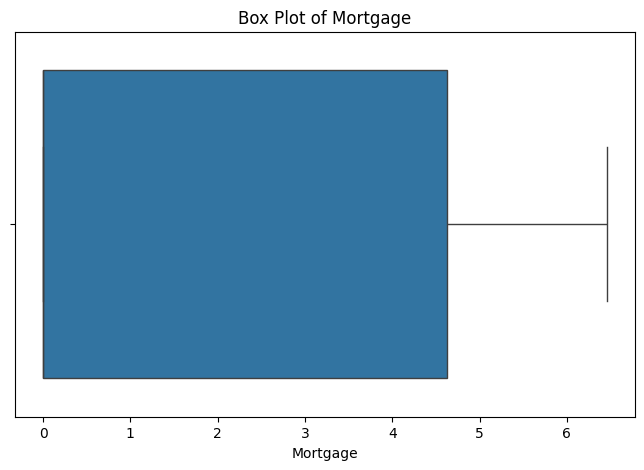

count    5000.000000
mean        1.566982
std         2.366428
min         0.000000
25%         0.000000
50%         0.000000
75%         4.624973
max         6.455199
Name: Mortgage, dtype: float64


In [13]:
# univariate analysis of Age, Experience, Income, Family, CCAvg, Education, Mortgage again

import matplotlib.pyplot as plt
# List of columns for univariate analysis
cols_for_analysis = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

# Create histograms and box plots for numerical variables
for col in cols_for_analysis:
    print(f"\nUnivariate analysis for {col}:")

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Basic statistics
    print(df[col].describe())

In [14]:
# list all columns

df.columns.tolist()

['Age',
 'Experience',
 'Family',
 'Education',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Income',
 'CCAvg',
 'Mortgage']


Bivariate analysis for Age vs Personal Loan:


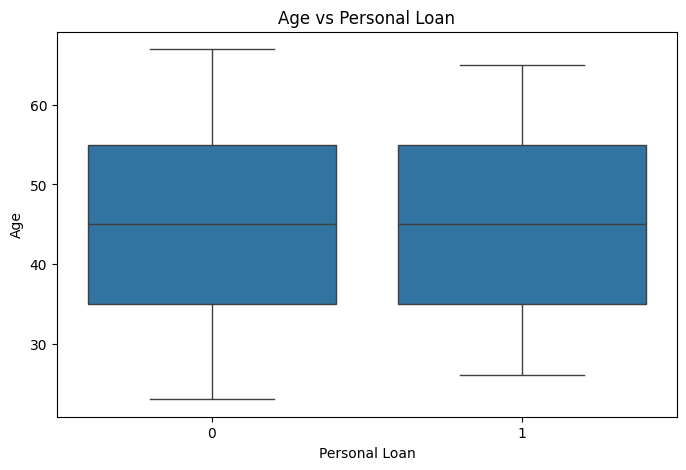

                    mean  median
Personal Loan                   
0              45.367257    45.0
1              45.066667    45.0

Bivariate analysis for Experience vs Personal Loan:


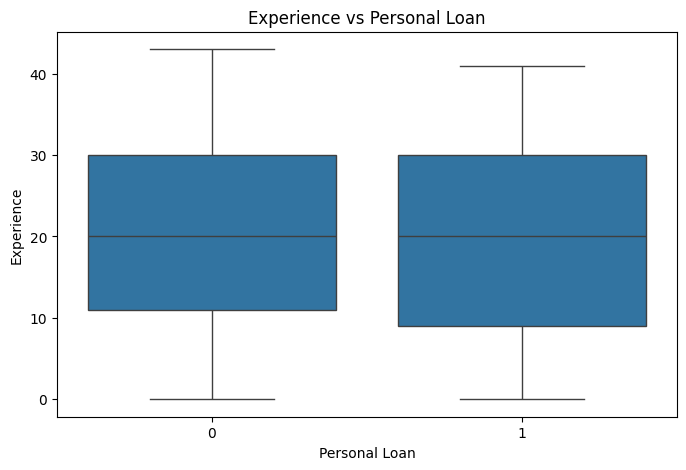

                    mean  median
Personal Loan                   
0              20.378982    20.0
1              19.843750    20.0

Bivariate analysis for Family vs Personal Loan:


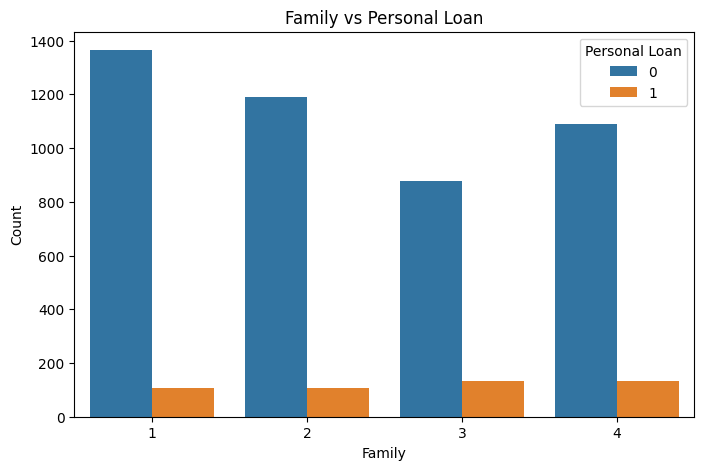

Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656

Bivariate analysis for Education vs Personal Loan:


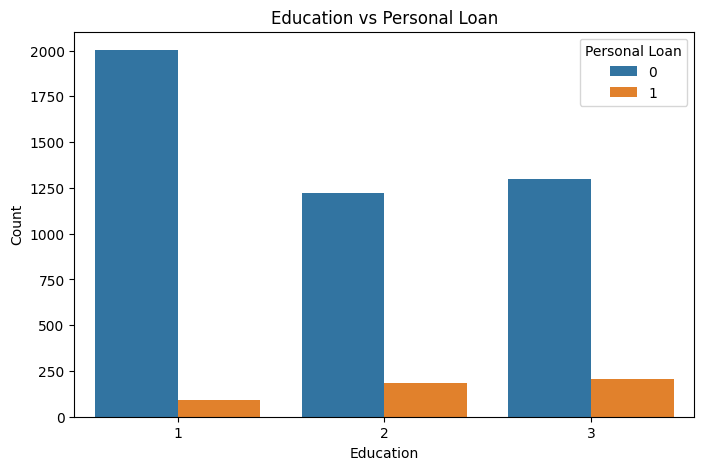

Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576

Bivariate analysis for Securities Account vs Personal Loan:


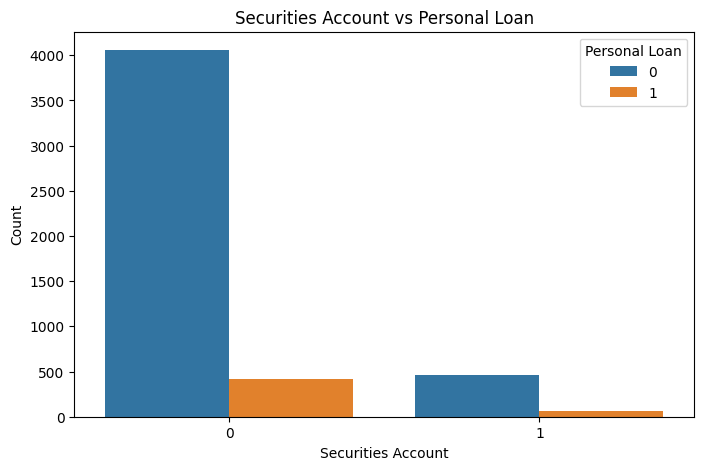

Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943

Bivariate analysis for CD Account vs Personal Loan:


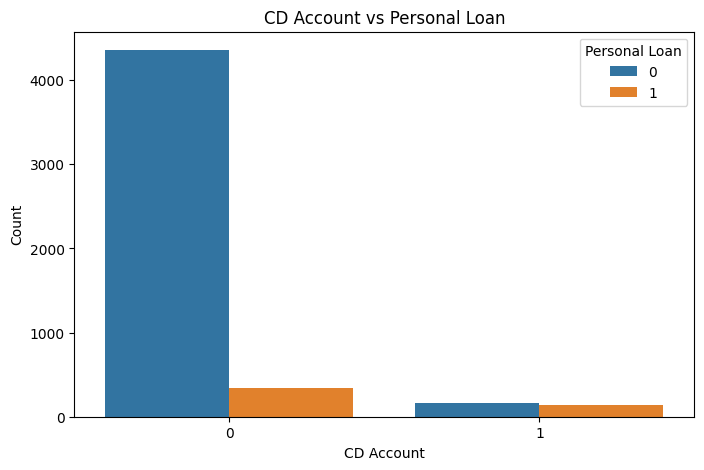

Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576

Bivariate analysis for Online vs Personal Loan:


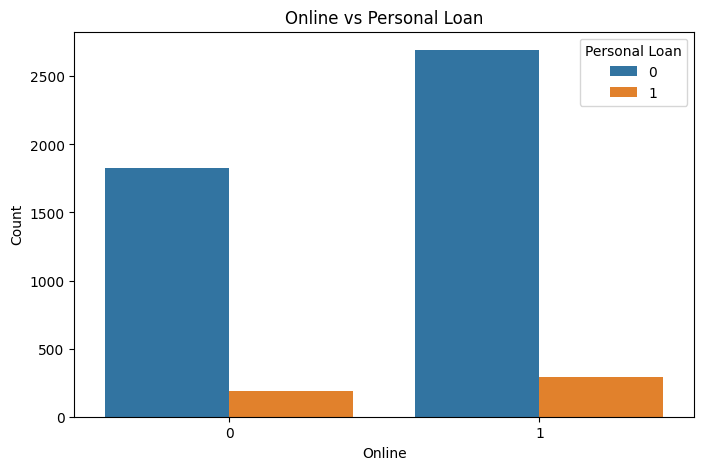

Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752

Bivariate analysis for CreditCard vs Personal Loan:


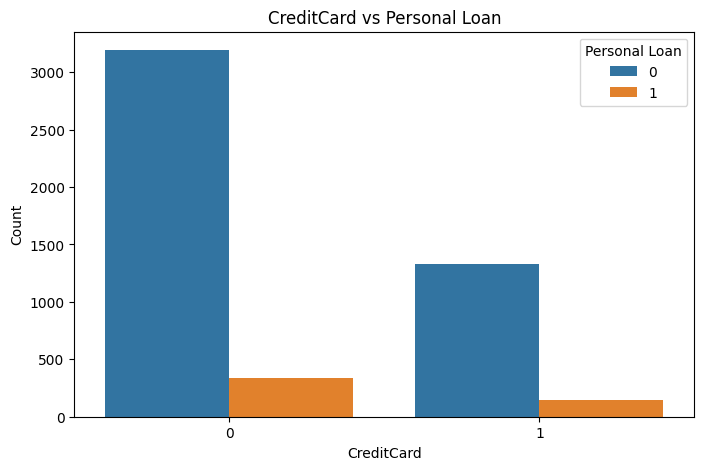

Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279

Bivariate analysis for Income vs Personal Loan:


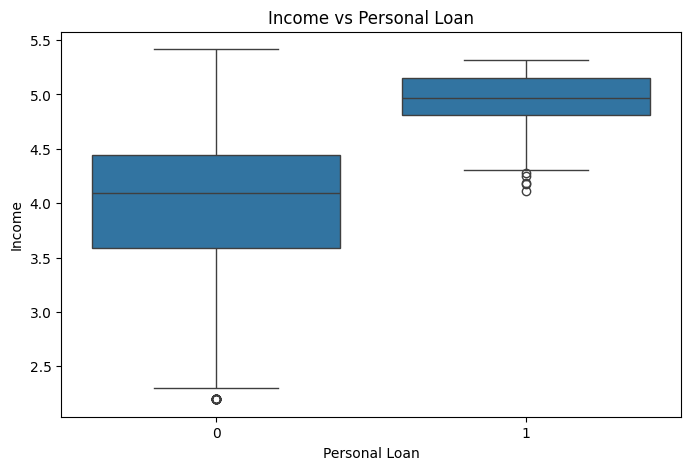

                   mean    median
Personal Loan                    
0              4.016781  4.094345
1              4.956066  4.966329

Bivariate analysis for CCAvg vs Personal Loan:


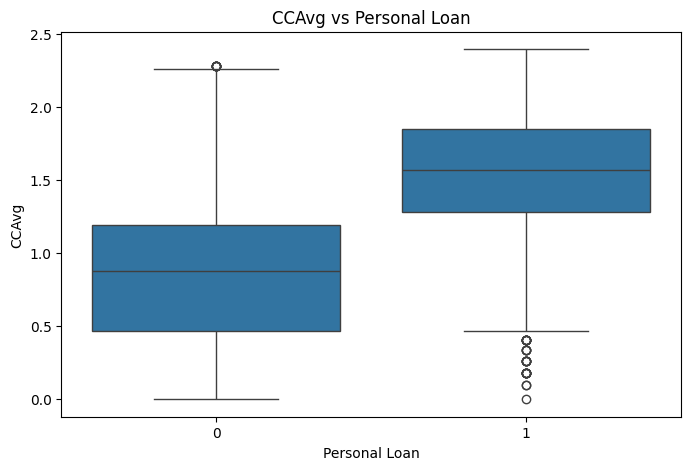

                   mean    median
Personal Loan                    
0              0.871021  0.875469
1              1.478678  1.568616

Bivariate analysis for Mortgage vs Personal Loan:


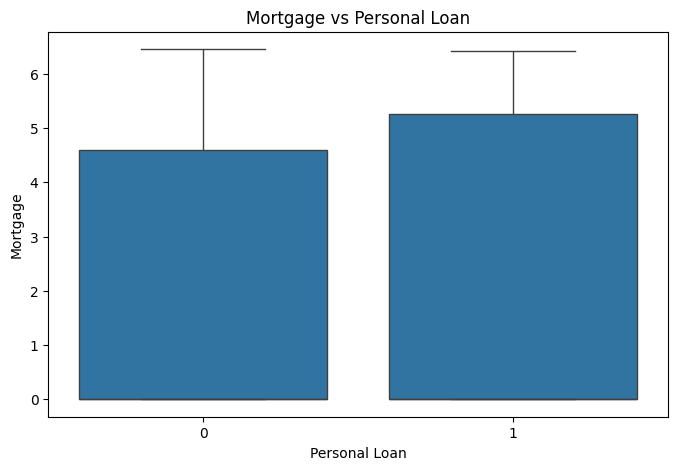

                   mean  median
Personal Loan                  
0              1.527685     0.0
1              1.937030     0.0


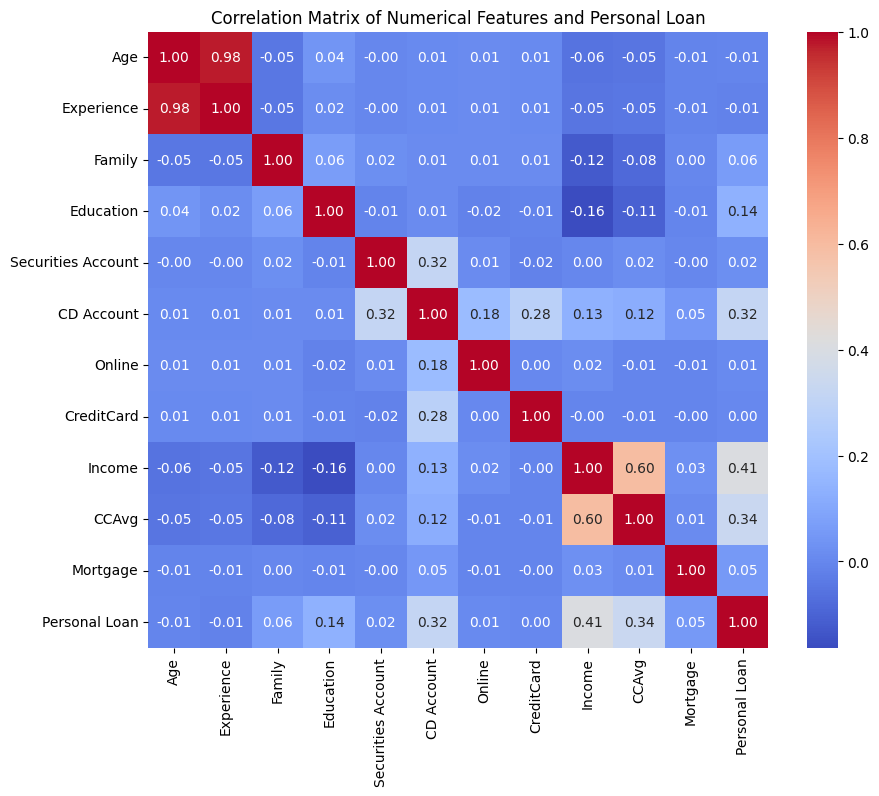


Correlation of numerical features with Personal Loan:
Personal Loan         1.000000
Income                0.406975
CCAvg                 0.335715
CD Account            0.316355
Education             0.136722
Family                0.061367
Mortgage              0.050963
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Experience           -0.014013
Name: Personal Loan, dtype: float64


In [15]:
# bivariate analysis with target variable - personal loan with all columns ['Age',
#  'Experience',
#  'Family',
#  'Education',
#  'Personal Loan',
#  'Securities Account',
#  'CD Account',
#  'Online',
#  'CreditCard',
#  'Income',
#  'CCAvg',
#  'Mortgage']


# List of all columns excluding the target variable
all_columns = ['Age', 'Experience', 'Family', 'Education', 'Securities Account',
               'CD Account', 'Online', 'CreditCard', 'Income', 'CCAvg', 'Mortgage']

target_variable = 'Personal Loan'

# Perform bivariate analysis with 'Personal Loan'
for col in all_columns:
    print(f"\nBivariate analysis for {col} vs {target_variable}:")

    if df[col].dtype == 'object' or df[col].nunique() < 10: # Categorical or low-cardinality numerical
        # Create a countplot or bar plot for categorical features
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_variable)
        plt.title(f'{col} vs {target_variable}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

        # Print crosstab for more detailed counts/percentages
        print(pd.crosstab(df[col], df[target_variable], normalize='index'))

    else: # Numerical features
        # Create a box plot or violin plot for numerical features
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_variable, y=col)
        plt.title(f'{col} vs {target_variable}')
        plt.xlabel(target_variable)
        plt.ylabel(col)
        plt.show()

        # Print average/median for each target class
        print(df.groupby(target_variable)[col].agg(['mean', 'median']))

# Look at correlations between numerical features and the target
numerical_cols = df[all_columns].select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numerical_cols + [target_variable]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Personal Loan')
plt.show()

print("\nCorrelation of numerical features with Personal Loan:")
print(correlation_matrix[target_variable].sort_values(ascending=False))


Original number of columns: 12
Number of highly correlated columns removed: 1
Columns removed: {'Age'}
Number of columns after removal: 11

DataFrame after removing highly correlated columns:
   Experience  Family  Education  Personal Loan  Securities Account  \
0         1.0       4          1              0                   1   
1        19.0       3          1              0                   1   
2        15.0       1          1              0                   0   
3         9.0       1          2              0                   0   
4         8.0       4          2              0                   0   

   CD Account  Online  CreditCard    Income     CCAvg  Mortgage  
0           0       0           0  3.912023  0.955511       0.0  
1           0       0           0  3.555348  0.916291       0.0  
2           0       0           0  2.484907  0.693147       0.0  
3           0       0           0  4.615121  1.308333       0.0  
4           0       0           1  3.828641  0.693

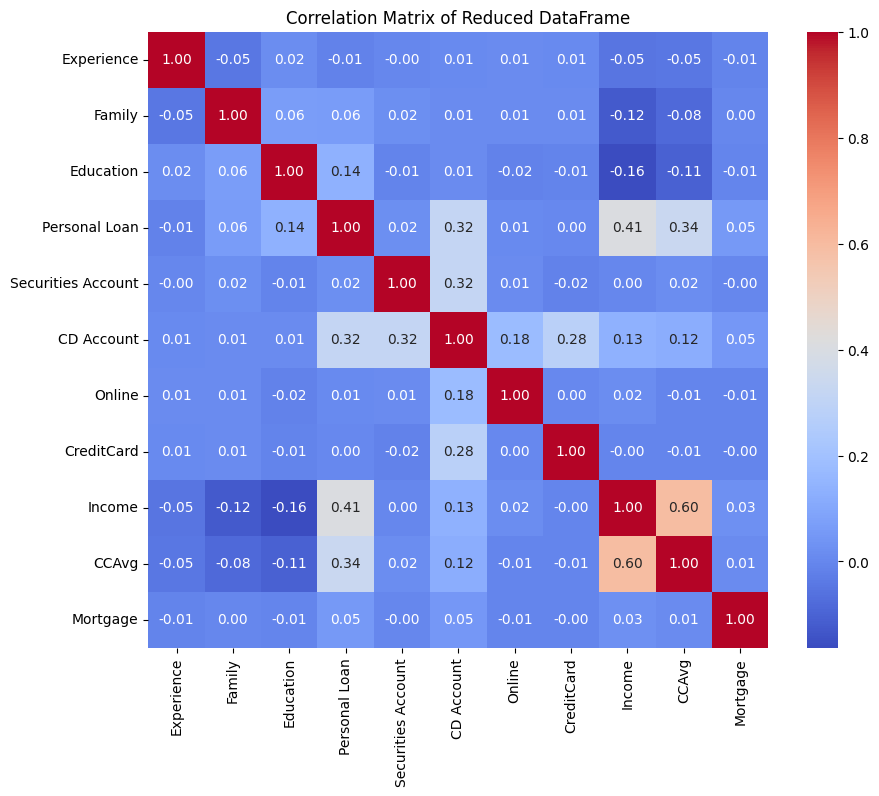

In [16]:
# remove highly correlated columns


# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Set a threshold for high correlation
threshold = 0.9

# Find columns that are highly correlated with each other (excluding self-correlation)
high_corr_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            # Decide which column to keep (e.g., keep the one with higher variance,
            # or simply drop one arbitrarily like colname_j)
            high_corr_cols.add(colname_j) # Add one of the correlated columns to the set

# Drop the identified highly correlated columns
df_reduced = df.drop(columns=high_corr_cols)

print(f"\nOriginal number of columns: {df.shape[1]}")
print(f"Number of highly correlated columns removed: {len(high_corr_cols)}")
print(f"Columns removed: {high_corr_cols}")
print(f"Number of columns after removal: {df_reduced.shape[1]}")

# Display the first few rows of the reduced DataFrame
print("\nDataFrame after removing highly correlated columns:")
print(df_reduced.head())

# Display the columns of the reduced DataFrame to verify
print("\nUpdated columns:")
print(df_reduced.columns)

# Optionally, visualize the correlation matrix again for the reduced DataFrame
print("\nCorrelation matrix of the reduced DataFrame:")
plt.figure(figsize=(10, 8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Reduced DataFrame')
plt.show()

In [17]:
# split the data into train and test 70-30

# Define features (X) and target (y)
X = df_reduced.drop('Personal Loan', axis=1)
y = df_reduced['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use of stratify to maintain the same proportion of target variable in both splits

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Verify the distribution of the target variable in train and test sets
print("\nDistribution of 'Personal Loan' in training set:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of 'Personal Loan' in test set:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (3500, 10)
Shape of X_test: (1500, 10)
Shape of y_train: (3500,)
Shape of y_test: (1500,)

Distribution of 'Personal Loan' in training set:
Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Distribution of 'Personal Loan' in test set:
Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


In [18]:
# log regression model for prediction of loans, get model summary

import statsmodels.api as sm

# Create the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42) # Using 'liblinear' solver for smaller datasets

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log}")
print("\nConfusion Matrix:\n", conf_matrix_log)
print("\nClassification Report:\n", class_report_log)

# Get the model summary using statsmodels
# Add a constant to the features (intercept term)
X_train_sm = sm.add_constant(X_train)

# Create and fit the logistic regression model using statsmodels
log_reg_sm = sm.Logit(y_train, X_train_sm).fit()

# Print the model summary
print("\nLogistic Regression Model Summary:")
print(log_reg_sm.summary())

Logistic Regression Accuracy: 0.9426666666666667

Confusion Matrix:
 [[1349    7]
 [  79   65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1356
           1       0.90      0.45      0.60       144

    accuracy                           0.94      1500
   macro avg       0.92      0.72      0.79      1500
weighted avg       0.94      0.94      0.93      1500

Optimization terminated successfully.
         Current function value: 0.118111
         Iterations 10

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.6265
Time:             

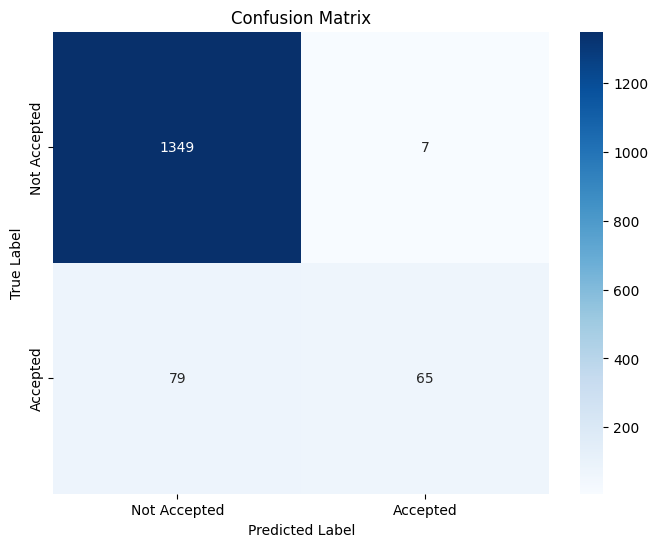

In [19]:
# color coded table for confusion matrix from results


# Function to plot the confusion matrix with color coding
def plot_confusion_matrix(cm, labels):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Labels for the confusion matrix
labels = ['Not Accepted', 'Accepted']

# Plot the confusion matrix for Logistic Regression
plot_confusion_matrix(conf_matrix_log, labels)

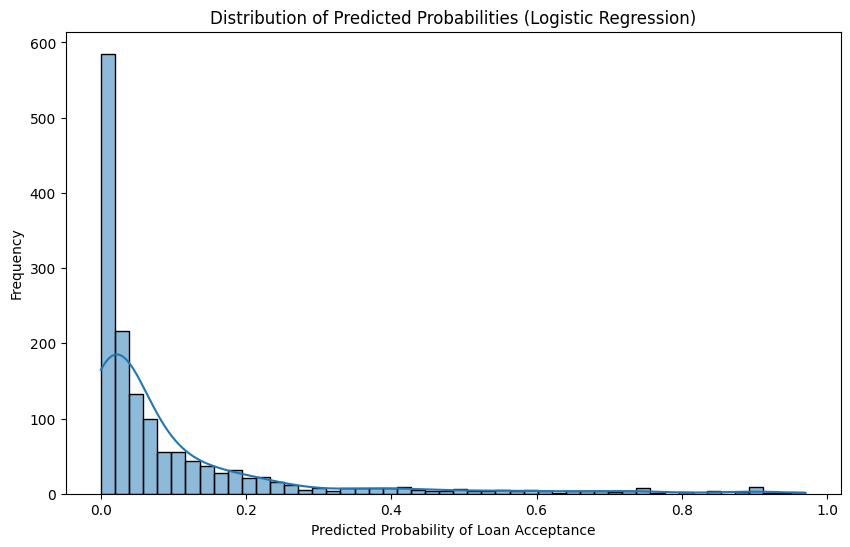

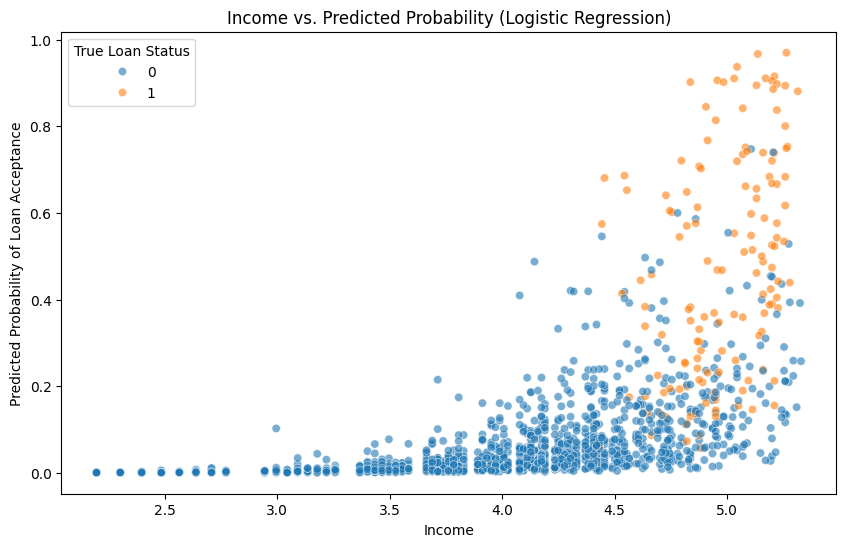

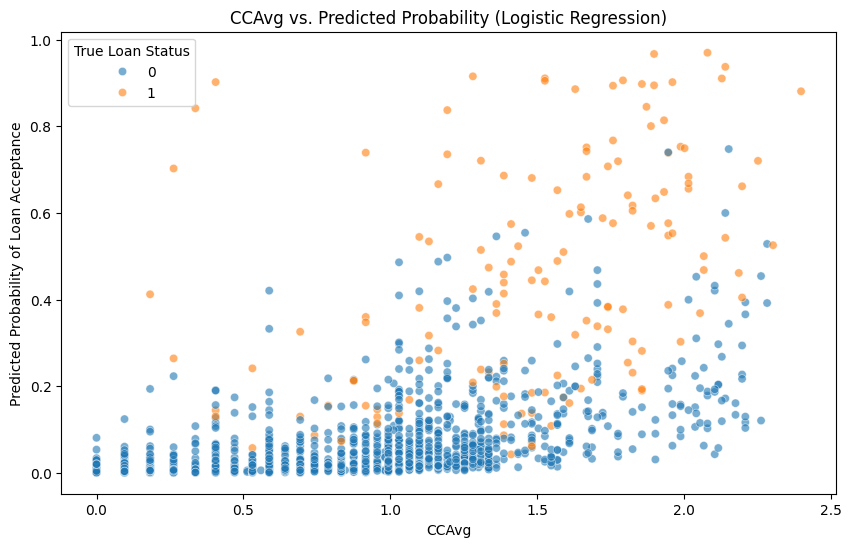

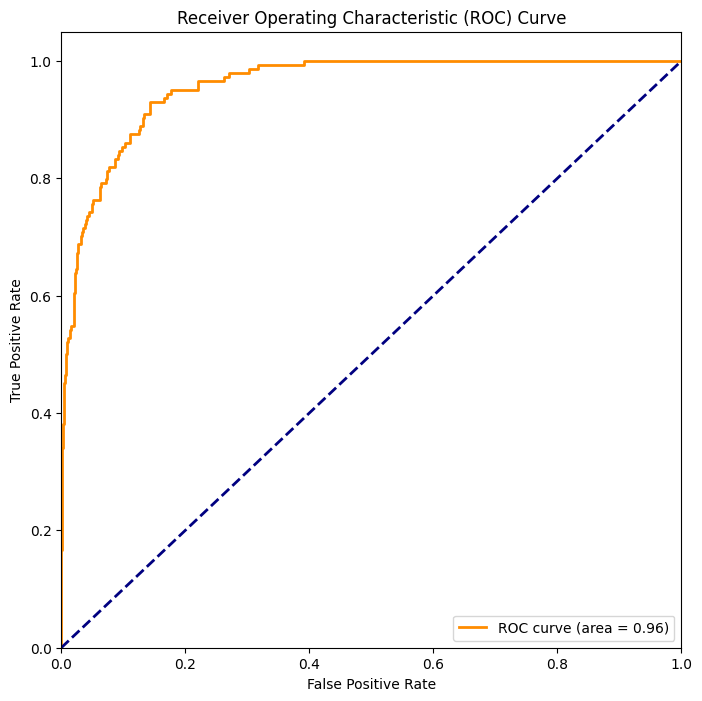

AUC Score (Logistic Regression): 0.9581028761061947


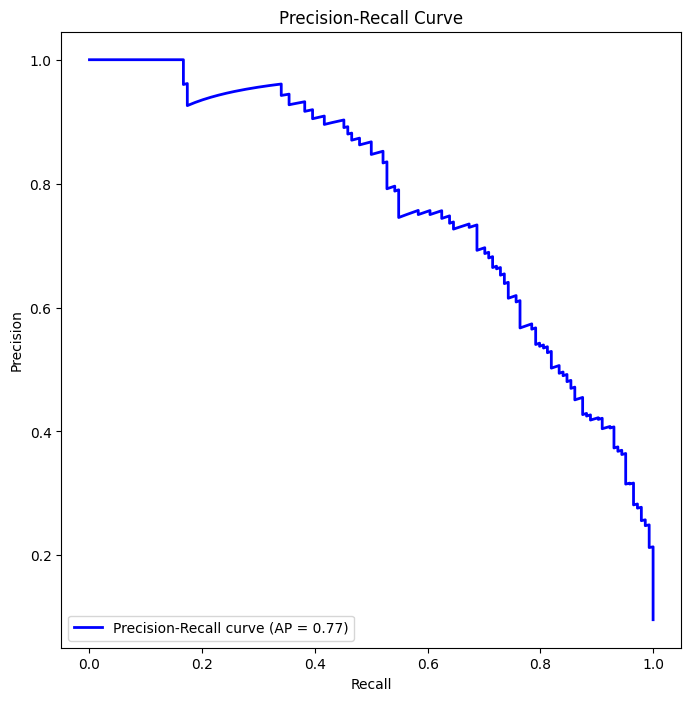

Average Precision Score (Logistic Regression): 0.7712406857784516


In [22]:
# required plots to understand and visualise model
import pandas as pd
import matplotlib.pyplot as plt
# Predict probabilities on the test set
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

# Plot a histogram of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba_log, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities (Logistic Regression)')
plt.xlabel('Predicted Probability of Loan Acceptance')
plt.ylabel('Frequency')
plt.show()

# Create a dataframe with true labels and predicted probabilities
results_df = pd.DataFrame({'True_Label': y_test, 'Predicted_Prob': y_pred_proba_log})

# Plot scatterplot of a few features vs. predicted probability, colored by true label
features_to_plot = ['Income', 'CCAvg', 'Age'] # Choose a few relevant features

for feature in features_to_plot:
    if feature in X_test.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=results_df, x=X_test[feature], y='Predicted_Prob', hue='True_Label', alpha=0.6)
        plt.title(f'{feature} vs. Predicted Probability (Logistic Regression)')
        plt.xlabel(feature)
        plt.ylabel('Predicted Probability of Loan Acceptance')
        plt.legend(title='True Loan Status')
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in test set. Skipping scatterplot.")

# ROC Curve (Receiver Operating Characteristic) and AUC (Area Under Curve)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)
auc = roc_auc_score(y_test, y_pred_proba_log)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score (Logistic Regression): {auc}")

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_log)
average_precision = average_precision_score(y_test, y_pred_proba_log)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print(f"Average Precision Score (Logistic Regression): {average_precision}")


<ipython-input-23-2657755660>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Actual', y='Predicted_Prob', data=results_df, jitter=True, palette='viridis', alpha=0.6)


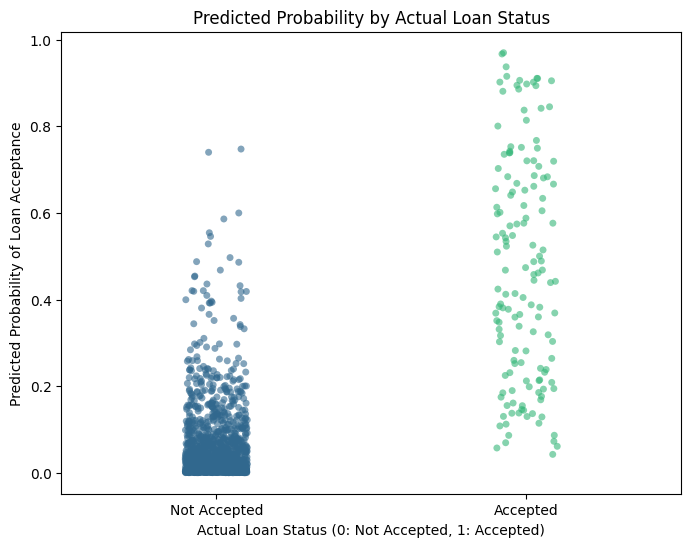

<ipython-input-23-2657755660>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Actual', y='Predicted_Prob', data=results_df, palette='viridis')


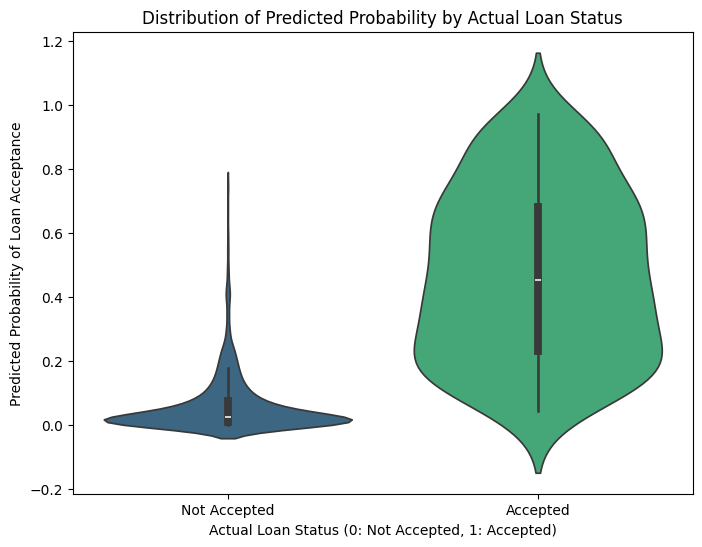

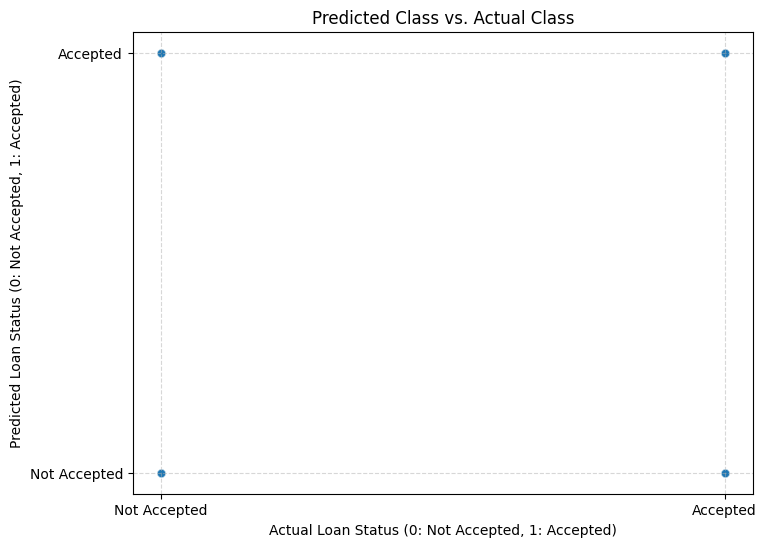

In [23]:
# scatterplot for predicted vs actual

# Scatter plot for predicted vs actual (for classification, this usually means probability vs actual)

# Create a dataframe to hold actual labels and predicted probabilities
results_df = pd.DataFrame({'Actual': y_test, 'Predicted_Prob': y_pred_proba_log})


# Let's use stripplot/swarmplot with jitter to show the distribution of predicted probabilities for each actual class.
plt.figure(figsize=(8, 6))
sns.stripplot(x='Actual', y='Predicted_Prob', data=results_df, jitter=True, palette='viridis', alpha=0.6)
plt.title('Predicted Probability by Actual Loan Status')
plt.xlabel('Actual Loan Status (0: Not Accepted, 1: Accepted)')
plt.ylabel('Predicted Probability of Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted']) # Set x-axis labels
plt.show()

# Alternative: Violin plot to see the distribution shape
plt.figure(figsize=(8, 6))
sns.violinplot(x='Actual', y='Predicted_Prob', data=results_df, palette='viridis')
plt.title('Distribution of Predicted Probability by Actual Loan Status')
plt.xlabel('Actual Loan Status (0: Not Accepted, 1: Accepted)')
plt.ylabel('Predicted Probability of Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

results_df['Predicted_Class'] = y_pred_log

plt.figure(figsize=(8, 6))
# Plot actual class on x-axis, predicted class on y-axis.
# Use some jitter or size/alpha to show density if points overlap a lot.
# Here, simply plotting as is will show where points fall.
sns.scatterplot(x='Actual', y='Predicted_Class', data=results_df, alpha=0.5)
plt.title('Predicted Class vs. Actual Class')
plt.xlabel('Actual Loan Status (0: Not Accepted, 1: Accepted)')
plt.ylabel('Predicted Loan Status (0: Not Accepted, 1: Accepted)')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.yticks([0, 1], ['Not Accepted', 'Accepted'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Distribution of 'Personal Loan' in training set before SMOTE:
Personal Loan
0    3164
1     336
Name: count, dtype: int64

Percentage distribution before SMOTE:
Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

Distribution of 'Personal Loan' in training set after SMOTE:
Personal Loan
0    3164
1    3164
Name: count, dtype: int64

Percentage distribution after SMOTE:
Personal Loan
0    50.0
1    50.0
Name: proportion, dtype: float64

--- Logistic Regression Model Performance (After SMOTE) ---
Accuracy (After SMOTE): 0.8693333333333333

Confusion Matrix (After SMOTE):
 [[1173  183]
 [  13  131]]

Classification Report (After SMOTE):
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      1356
           1       0.42      0.91      0.57       144

    accuracy                           0.87      1500
   macro avg       0.70      0.89      0.75      1500
weighted avg       0.93      0.87      0.89      1500



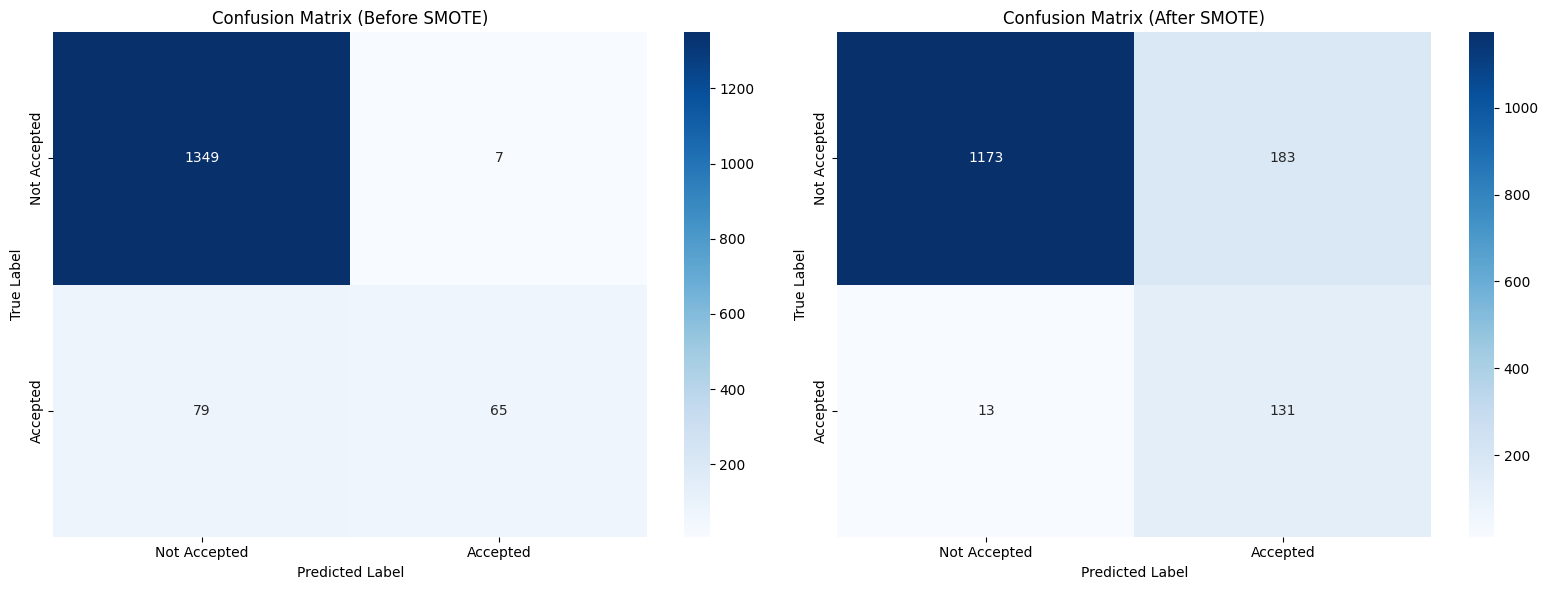

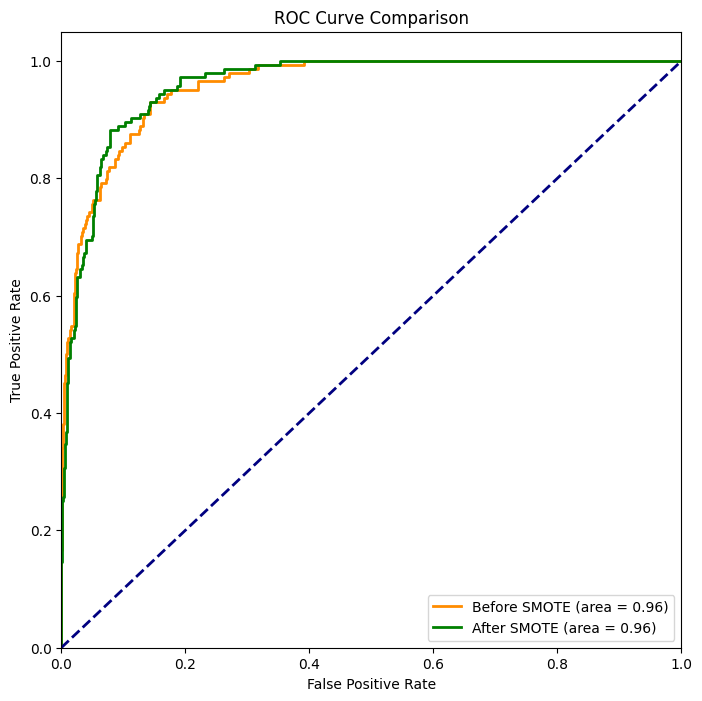

AUC Score (Before SMOTE): 0.96
AUC Score (After SMOTE): 0.96


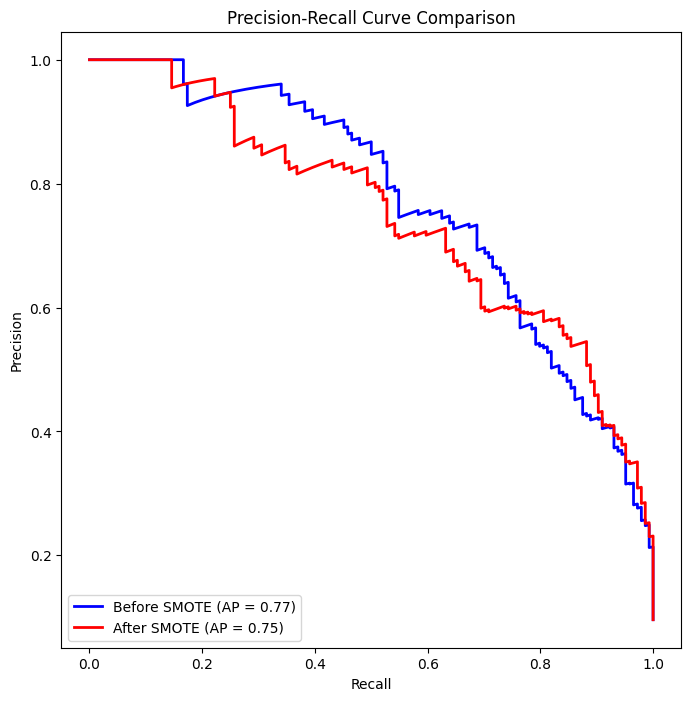

Average Precision Score (Before SMOTE): 0.77
Average Precision Score (After SMOTE): 0.75

--- Statistical Comparison ---

Comparison of Key Metrics (Test Set):
Metric         | Before SMOTE | After SMOTE
---------------|--------------|-------------
Accuracy       | 0.9427       | 0.8693     
Precision (1)  | 0.9028       | 0.4172     
Recall (1)     | 0.4514       | 0.9097     
F1-Score (1)   | 0.6019       | 0.5721     
AUC            | 0.9581       | 0.9602     
Avg Precision  | 0.7712       | 0.7488     

Interpretation:
Look at the Recall (Sensitivity) and F1-Score for the minority class ('1' - Personal Loan Accepted).
SMOTE aims to improve the model's ability to identify the minority class.
Recall for class 1 increased from 0.4514 to 0.9097.
F1-Score for class 1 changed from 0.6019 to 0.5721.
Precision for class 1 changed from 0.9028 to 0.4172.
Overall Accuracy changed from 0.9427 to 0.8693.
AUC changed from 0.9581 to 0.9602.
Average Precision changed from 0.7712 to 0.7488.
The im

In [24]:
# SMOTE

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter

# Before SMOTE: Check the distribution of the target variable in the training set
print("Distribution of 'Personal Loan' in training set before SMOTE:")
print(y_train.value_counts())
print("\nPercentage distribution before SMOTE:")
print(y_train.value_counts(normalize=True) * 100)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After SMOTE: Check the distribution again
print("\nDistribution of 'Personal Loan' in training set after SMOTE:")
print(y_train_smote.value_counts())
print("\nPercentage distribution after SMOTE:")
print(y_train_smote.value_counts(normalize=True) * 100)

# Train the Logistic Regression model on the SMOTE-augmented training data
log_reg_smote = LogisticRegression(solver='liblinear', random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
y_pred_log_smote = log_reg_smote.predict(X_test)
y_pred_proba_log_smote = log_reg_smote.predict_proba(X_test)[:, 1]

# Evaluate the model trained with SMOTE
accuracy_log_smote = accuracy_score(y_test, y_pred_log_smote)
conf_matrix_log_smote = confusion_matrix(y_test, y_pred_log_smote)
class_report_log_smote = classification_report(y_test, y_pred_log_smote)

print("\n--- Logistic Regression Model Performance (After SMOTE) ---")
print(f"Accuracy (After SMOTE): {accuracy_log_smote}")
print("\nConfusion Matrix (After SMOTE):\n", conf_matrix_log_smote)
print("\nClassification Report (After SMOTE):\n", class_report_log_smote)

# --- Visual Comparison ---

# 1. Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix (Before SMOTE)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_log_smote, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix (After SMOTE)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# 2. ROC Curve Comparison
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_log_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_log_smote)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Before SMOTE (area = %0.2f)' % auc)
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label='After SMOTE (area = %0.2f)' % auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score (Before SMOTE): {auc:.2f}")
print(f"AUC Score (After SMOTE): {auc_smote:.2f}")

# 3. Precision-Recall Curve Comparison
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_pred_proba_log_smote)
average_precision_smote = average_precision_score(y_test, y_pred_proba_log_smote)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Before SMOTE (AP = %0.2f)' % average_precision)
plt.plot(recall_smote, precision_smote, color='red', lw=2, label='After SMOTE (AP = %0.2f)' % average_precision_smote)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

print(f"Average Precision Score (Before SMOTE): {average_precision:.2f}")
print(f"Average Precision Score (After SMOTE): {average_precision_smote:.2f}")

# --- Statistical Comparison ---

print("\n--- Statistical Comparison ---")

# Compare key metrics from classification reports
print("\nComparison of Key Metrics (Test Set):")
print("Metric         | Before SMOTE | After SMOTE")
print("---------------|--------------|-------------")
# Extract metrics for the positive class (class 1)
report_before = classification_report(y_test, y_pred_log, output_dict=True)
report_after = classification_report(y_test, y_pred_log_smote, output_dict=True)

precision_before = report_before['1']['precision']
recall_before = report_before['1']['recall']
f1_before = report_before['1']['f1-score']

precision_after = report_after['1']['precision']
recall_after = report_after['1']['recall']
f1_after = report_after['1']['f1-score']
accuracy_before = report_before['accuracy']
accuracy_after = report_after['accuracy']


print(f"Accuracy       | {accuracy_before:<12.4f} | {accuracy_after:<11.4f}")
print(f"Precision (1)  | {precision_before:<12.4f} | {precision_after:<11.4f}")
print(f"Recall (1)     | {recall_before:<12.4f} | {recall_after:<11.4f}")
print(f"F1-Score (1)   | {f1_before:<12.4f} | {f1_after:<11.4f}")
print(f"AUC            | {auc:<12.4f} | {auc_smote:<11.4f}")
print(f"Avg Precision  | {average_precision:<12.4f} | {average_precision_smote:<11.4f}")

print("\nInterpretation:")
print("Look at the Recall (Sensitivity) and F1-Score for the minority class ('1' - Personal Loan Accepted).")
print("SMOTE aims to improve the model's ability to identify the minority class.")
print(f"Recall for class 1 increased from {recall_before:.4f} to {recall_after:.4f}.")
print(f"F1-Score for class 1 changed from {f1_before:.4f} to {f1_after:.4f}.")
print(f"Precision for class 1 changed from {precision_before:.4f} to {precision_after:.4f}.")
print(f"Overall Accuracy changed from {accuracy_before:.4f} to {accuracy_after:.4f}.")
print(f"AUC changed from {auc:.4f} to {auc_smote:.4f}.")
print(f"Average Precision changed from {average_precision:.4f} to {average_precision_smote:.4f}.")
print("The impact on these metrics indicates how well the model performs on the imbalanced dataset after addressing the class imbalance with SMOTE.")



--- Decision Tree Model Performance (After SMOTE with GridSearchCV) ---
Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy (Decision Tree After SMOTE + GridSearchCV): 0.9566666666666667

Confusion Matrix (Decision Tree After SMOTE + GridSearchCV):
 [[1296   60]
 [   5  139]]

Classification Report (Decision Tree After SMOTE + GridSearchCV):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1356
           1       0.70      0.97      0.81       144

    accuracy                           0.96      1500
   macro avg       0.85      0.96      0.89      1500
weighted avg       0.97      0.96      0.96      1500


AUC Score (Decision Tree After SMOTE + GridSearchCV): 0.9605
Average Precision Score (Decision Tree After SMOTE + GridSearchCV): 0.6776


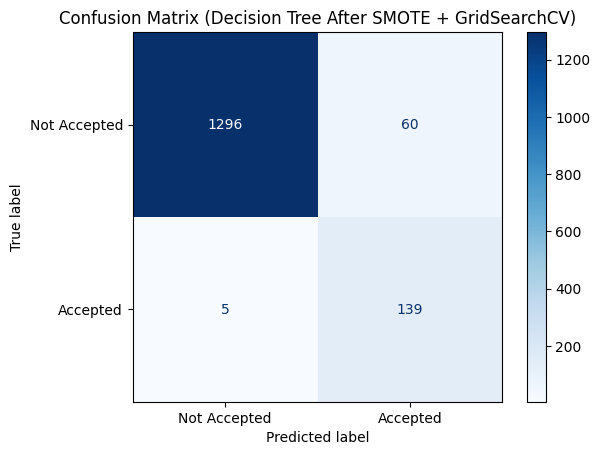

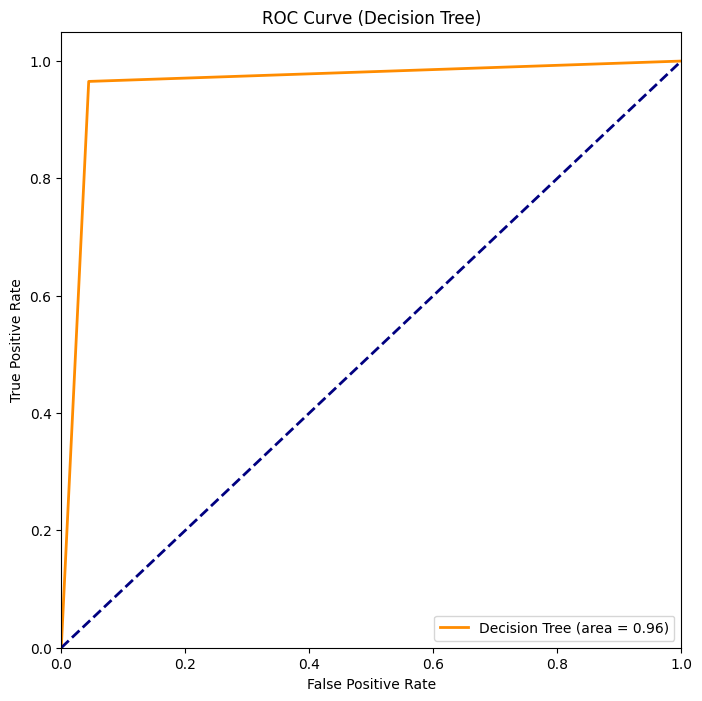

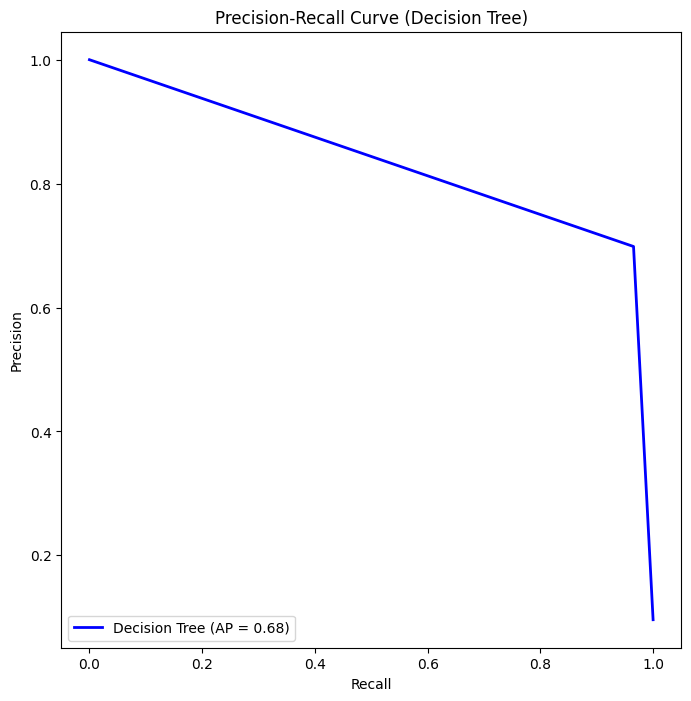


Maximum depth of the best Decision Tree: None

--- Model Comparison (SMOTE Versions) ---
Metric         | Logistic Regression | Decision Tree
---------------|---------------------|---------------
Accuracy       | 0.8693              | 0.9567       
Precision (1)  | 0.4172              | 0.6985       
Recall (1)     | 0.9097              | 0.9653       
F1-Score (1)   | 0.5721              | 0.8105       
AUC            | 0.9602              | 0.9605       
Avg Precision  | 0.7488              | 0.6776       

Interpretation:
Compare the metrics, especially Recall and F1-Score for class 1, to see which model performs better at identifying Personal Loan acceptance.
Consider the AUC and Average Precision as overall measures of model performance, particularly useful for imbalanced datasets.
GridSearchCV was used with the Decision Tree to mitigate overfitting and find optimal parameters.
The best Decision Tree parameters found are: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf

In [28]:
# decision tree model using the data -To fairly compare models (e.g., Logistic Regression vs. Decision Tree), you must test them on the same unseen data. Use SMOTE-augmented data for training, but not for testing. Model evaluation Only on original (unmodified) test data. make the decision tree perfect with iterations for not overfit

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay for plotting

# Assume X_train_smote, y_train_smote, X_test, y_test, labels,

# Train the Decision Tree model on the SMOTE-augmented training data
# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8, 16], # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Create a Decision Tree Classifier instance
dt_clf = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) # Use recall as the scoring metric due to class imbalance

# Fit the GridSearchCV to the SMOTE-augmented training data
# The GridSearchCV will train multiple trees with different parameter combinations
# and use cross-validation to find the best combination.
grid_search.fit(X_train_smote, y_train_smote)

# Get the best Decision Tree model from the grid search
best_dt_clf = grid_search.best_estimator_

print("\n--- Decision Tree Model Performance (After SMOTE with GridSearchCV) ---")
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Make predictions on the original test set using the best model
y_pred_dt_smote = best_dt_clf.predict(X_test)
y_pred_proba_dt_smote = best_dt_clf.predict_proba(X_test)[:, 1]

# Evaluate the best model on the original test set
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
conf_matrix_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)
# Assign the dictionary output to class_report_dt_smote
class_report_dt_smote = classification_report(y_test, y_pred_dt_smote, output_dict=True)
auc_dt_smote = roc_auc_score(y_test, y_pred_proba_dt_smote)
average_precision_dt_smote = average_precision_score(y_test, y_pred_proba_dt_smote)


print(f"\nAccuracy (Decision Tree After SMOTE + GridSearchCV): {accuracy_dt_smote}")
print("\nConfusion Matrix (Decision Tree After SMOTE + GridSearchCV):\n", conf_matrix_dt_smote)
# Print the standard report (using the string format)
print("\nClassification Report (Decision Tree After SMOTE + GridSearchCV):\n", classification_report(y_test, y_pred_dt_smote))
print(f"\nAUC Score (Decision Tree After SMOTE + GridSearchCV): {auc_dt_smote:.4f}")
print(f"Average Precision Score (Decision Tree After SMOTE + GridSearchCV): {average_precision_dt_smote:.4f}")


# Plot the confusion matrix for the best Decision Tree model
# Ensure plot_confusion_matrix is available and labels are defined
# This function might need to be imported or defined depending on your environment
# from sklearn.metrics import plot_confusion_matrix # If using a newer sklearn version, this function is available

# 'labels' is a list of class names, e.g., ['Not Accepted', 'Accepted']
# Use ConfusionMatrixDisplay for plotting confusion matrix
try:
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt_smote, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix (Decision Tree After SMOTE + GridSearchCV)')
    plt.show()
except NameError:
     print("\nSkipping Confusion Matrix plot: 'labels' variable not found.")
except ValueError as e:
     print(f"\nSkipping Confusion Matrix plot: Error plotting - {e}")


# Plot ROC Curve for Decision Tree
fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_test, y_pred_proba_dt_smote)

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt_smote, tpr_dt_smote, color='darkorange', lw=2, label='Decision Tree (area = %0.2f)' % auc_dt_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve for Decision Tree
precision_dt_smote, recall_dt_smote, _ = precision_recall_curve(y_test, y_pred_proba_dt_smote)

plt.figure(figsize=(8, 8))
plt.plot(recall_dt_smote, precision_dt_smote, color='blue', lw=2, label='Decision Tree (AP = %0.2f)' % average_precision_dt_smote)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.legend(loc="lower left")
plt.show()

# Max depth of the best tree
max_depth_best_dt = best_dt_clf.get_params()['max_depth']
print(f"\nMaximum depth of the best Decision Tree: {max_depth_best_dt}")



# Compare Decision Tree with Logistic Regression (SMOTE versions)

print("\n--- Model Comparison (SMOTE Versions) ---")
print("Metric         | Logistic Regression | Decision Tree")
print("---------------|---------------------|---------------")

# Assuming these variables exist from a previous Logistic Regression section
# accuracy_log_smote, precision_after, recall_after, f1_after, auc_smote, average_precision_smote
try:
    print(f"Accuracy       | {accuracy_log_smote:<19.4f} | {accuracy_dt_smote:<13.4f}")
    # Use class_report_dt_smote here
    print(f"Precision (1)  | {precision_after:<19.4f} | {class_report_dt_smote['1']['precision']:<13.4f}")
    print(f"Recall (1)     | {recall_after:<19.4f} | {class_report_dt_smote['1']['recall']:<13.4f}")
    print(f"F1-Score (1)   | {f1_after:<19.4f} | {class_report_dt_smote['1']['f1-score']:<13.4f}")
    print(f"AUC            | {auc_smote:<19.4f} | {auc_dt_smote:<13.4f}")
    print(f"Avg Precision  | {average_precision_smote:<19.4f} | {average_precision_dt_smote:<13.4f}")
except NameError:
    print("Logistic Regression comparison skipped: Variables from Logistic Regression model not found.")


print("\nInterpretation:")
print("Compare the metrics, especially Recall and F1-Score for class 1, to see which model performs better at identifying Personal Loan acceptance.")
print("Consider the AUC and Average Precision as overall measures of model performance, particularly useful for imbalanced datasets.")
print("GridSearchCV was used with the Decision Tree to mitigate overfitting and find optimal parameters.")
print("The best Decision Tree parameters found are:", grid_search.best_params_)



Decision tree is deep (19 levels). Visualizing up to depth 5 for clarity.


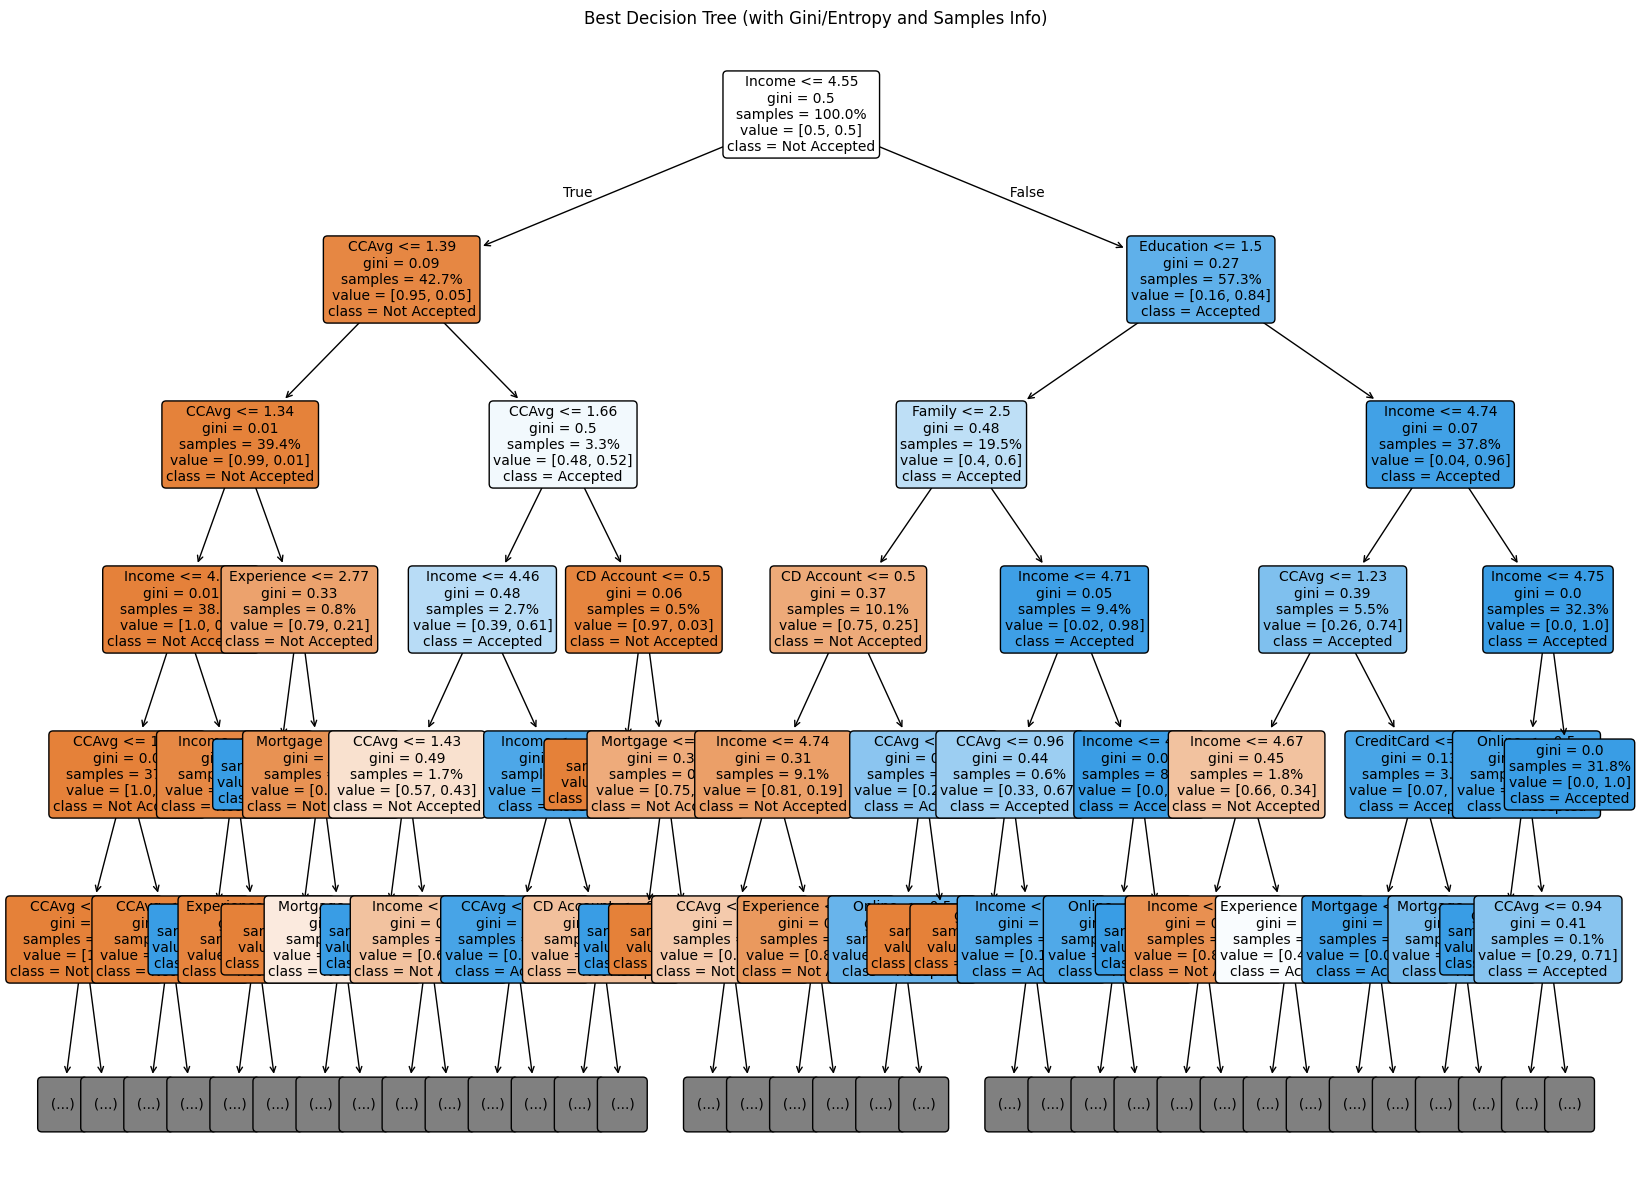

In [29]:
# final decision tree visually with related metrics

import matplotlib.pyplot as plt
# Visualize the best Decision Tree


plt.figure(figsize=(20, 15))
# Check if the best tree's depth is manageable for plotting
# If max_depth was set to None, it could be very large
# Let's visualize up to a certain depth to keep the plot readable
plot_max_depth = best_dt_clf.tree_.max_depth # Get the actual maximum depth of the fitted tree
if plot_max_depth > 10: # Heuristic: limit visualization if deeper than 10 levels
    print(f"\nDecision tree is deep ({plot_max_depth} levels). Visualizing up to depth 5 for clarity.")
    plot_tree(best_dt_clf,
              max_depth=5, # Visualize up to depth 5
              feature_names=X_train_smote.columns.tolist(),
              class_names=['Not Accepted', 'Accepted'],
              filled=True,
              rounded=True,
              fontsize=10,
              proportion=True, # Show proportion of samples in each class
              precision=2) # Show metrics with 2 decimal places
else:
     print(f"\nVisualizing Decision Tree (Max Depth: {plot_max_depth}).")
     plot_tree(best_dt_clf,
              feature_names=X_train_smote.columns.tolist(),
              class_names=['Not Accepted', 'Accepted'],
              filled=True,
              rounded=True,
              fontsize=10,
              proportion=True, # Show proportion of samples in each class
              precision=2) # Show metrics with 2 decimal places


plt.title('Best Decision Tree (with Gini/Entropy and Samples Info)')
plt.show()

